# Import necessary libraries and dataset

In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [323]:
data=pd.read_csv('crimes_against_women_2001-2014.csv')
data.head(5)

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


In [324]:
data.shape

(10677, 11)

In [325]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10677 entries, 0 to 10676
Data columns (total 11 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Unnamed: 0                                           10677 non-null  int64 
 1   STATE/UT                                             10677 non-null  object
 2   DISTRICT                                             10677 non-null  object
 3   Year                                                 10677 non-null  int64 
 4   Rape                                                 10677 non-null  int64 
 5   Kidnapping and Abduction                             10677 non-null  int64 
 6   Dowry Deaths                                         10677 non-null  int64 
 7   Assault on women with intent to outrage her modesty  10677 non-null  int64 
 8   Insult to modesty of Women                           10677 non-null  int64 


# DATA CLEANING

In [326]:
data.isnull().sum()

,0
Unnamed: 0,0
STATE/UT,0
DISTRICT,0
Year,0
Rape,0
Kidnapping and Abduction,0
Dowry Deaths,0
Assault on women with intent to outrage her modesty,0
Insult to modesty of Women,0
Cruelty by Husband or his Relatives,0


In [327]:
print(data['STATE/UT'].unique())

['ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU'
 'TRIPURA' 'UTTAR PRADESH' 'UTTARAKHAND' 'WEST BENGAL' 'A & N ISLANDS'
 'CHANDIGARH' 'D & N HAVELI' 'DAMAN & DIU' 'DELHI' 'LAKSHADWEEP'
 'PUDUCHERRY' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar'
 'Chhattisgarh' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh'
 'Jammu & Kashmir' 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal' 'A&N Islands' 'Chandigarh' 'D&N Haveli'
 'Daman & Diu' 'Delhi UT' 'Lakshadweep' 'Puducherry' 'Telangana'
 'A & N Islands']


In [328]:
data['STATE/UT'] = data['STATE/UT'].str.strip().str.upper()
data['STATE/UT'] = data['STATE/UT'].replace({'DELHI UT': 'DELHI'})
data['STATE/UT'] = data['STATE/UT'].replace({'A & N ISLANDS': 'A&N ISLANDS'})
data['STATE/UT'] = data['STATE/UT'].replace({'D&N HAVELI': 'D&N HAVELI'})
print(data['STATE/UT'].unique())

['ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU'
 'TRIPURA' 'UTTAR PRADESH' 'UTTARAKHAND' 'WEST BENGAL' 'A&N ISLANDS'
 'CHANDIGARH' 'D & N HAVELI' 'DAMAN & DIU' 'DELHI' 'LAKSHADWEEP'
 'PUDUCHERRY' 'D&N HAVELI' 'TELANGANA']


In [329]:
data.drop(columns='Unnamed: 0',inplace=True)
data.head(2)

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0


In [330]:
data.duplicated().sum()

0

In [331]:
data.describe()

,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
count,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000
mean,2007.697949,57.989885,69.888358,20.181699,113.539196,27.419313,209.224314,0.175330
std,4.046874,214.230398,311.623450,98.276531,458.903951,167.806797,905.664362,2.228637
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,8.000000,6.000000,1.000000,10.000000,0.000000,11.000000,0.000000
50%,2008.000000,22.000000,20.000000,5.000000,34.000000,2.000000,50.000000,0.000000
75%,2011.000000,44.000000,49.000000,16.000000,85.000000,12.000000,144.000000,0.000000
max,2014.000000,5076.000000,10626.000000,2469.000000,10001.000000,4970.000000,23278.000000,83.000000


In [332]:
y={'Kidnapping and Abduction':'Kidnapping','Dowry Deaths':'Dowry_Deaths','Assault on women with intent to outrage her modesty':'Assault','Insult to modesty of Women':'Insult','Cruelty by Husband or his Relatives':'Domestic','Importation of Girls':'Importation'}
data.rename(columns=y,inplace=True)
data.head(2)

,STATE/UT,DISTRICT,Year,Rape,Kidnapping,Dowry_Deaths,Assault,Insult,Domestic,Importation
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0


# EXPLORATORY DATA ANALYSIS (EDA)

YEARWISE ANALYSIS

In [333]:
crime_columns = ['Rape', 'Kidnapping',	'Dowry_Deaths',	'Assault',	'Insult',	'Domestic',	'Importation']

CRIME COUNTS PER CATEGORY

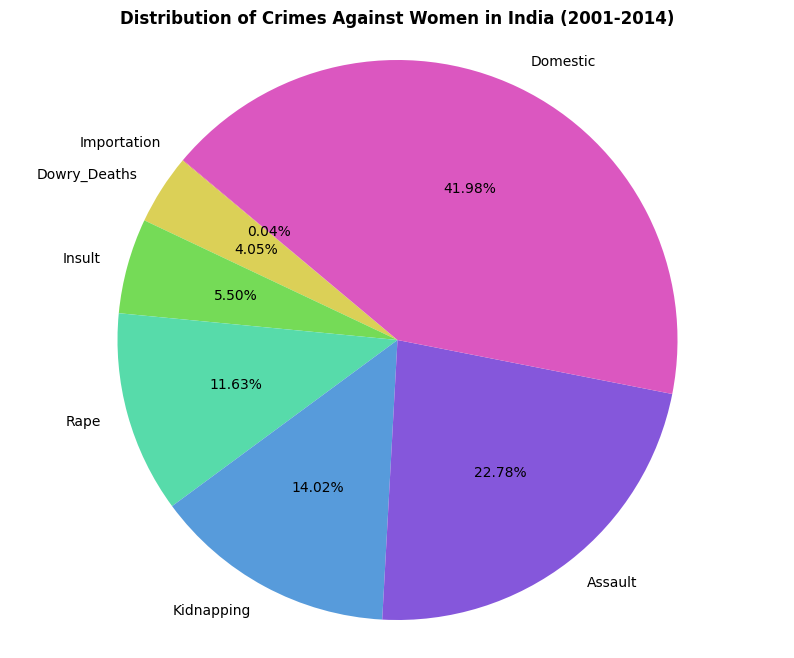

In [334]:
crime_counts=data[crime_columns].sum()
crime_distribution=crime_counts.sort_values(ascending=True)
title_font = {'fontsize': 12, 'fontweight': 'bold', 'color': 'black', 'family': 'sans-serif'}
colors = sns.color_palette("hls", len(crime_distribution))

plt.figure(figsize=(10, 8))
plt.pie(crime_distribution, labels=crime_distribution.index, autopct='%1.2f%%', startangle=140, colors=colors)
plt.title('Distribution of Crimes Against Women in India (2001-2014)',fontdict=title_font)
plt.axis('equal')
plt.show()

**NOTE 1: Domestic Violence contributes 41.98% to total crimes against women, being the most reported one while Importation of Girls is the least reported one with just 0.04%**



**NOTE 2 : There are atleast twice as many cases of domestic violence, as there are cases of assualt - that being the second most reported one (22.78%)**

TOTAL COUNT PER CATEGORY YEARWISE

In [335]:
#TOTAL COUNT PER CATEGORY YEAR_WISE
def Count(all_cases):
    for i in crime_columns:
        all_cases[i] = data.groupby(['Year'])[i].sum()
        all_cases['Year'] = all_cases.index
    return all_cases

all_cases = pd.DataFrame()
all_cases = Count(all_cases)
all_cases

,Rape,Year,Kidnapping,Dowry_Deaths,Assault,Insult,Domestic,Importation
Year,,,,,,,,
2001,32150,2001,29290,13702,68248,19492,98340,228
2002,32746,2002,29012,13644,67886,20310,98474,152
2003,31694,2003,26592,12416,65878,24650,101406,92
2004,36466,2004,31156,14052,69134,20002,116242,178
2005,36718,2005,31500,13574,68350,19968,116638,298
2006,38696,2006,34828,15236,73234,19932,126256,134
2007,41474,2007,40832,16186,77468,21900,151860,122
2008,42934,2008,45878,16344,80826,24428,162688,134
2009,42794,2009,51482,16766,77422,22018,179092,96


      Total no of crimes
Year                    
2001              263451
2002              264226
2003              264731
2004              289234
2005              289051
2006              310322
2007              351849
2008              375240
2009              391679
2010              412028
2011              440295
2012              467068
2013              593805
2014              636736


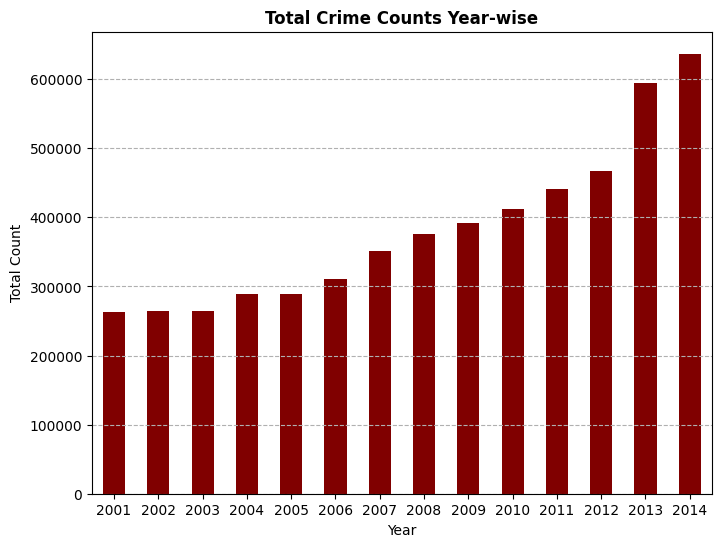

In [336]:
#TOTAL COUNT YEAR_WISE
yearly_count=pd.DataFrame(all_cases.sum(axis=1), columns=["Total no of crimes"])

plt.figure(figsize=(8, 6))
yearly_count['Total no of crimes'].plot(kind='bar', color='maroon')
plt.title('Total Crime Counts Year-wise', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
print(yearly_count)

**NOTE 3: We can observe that there's a sharp increase in total number of crimes during 2012-2013 (approx ~ 126,700 + )**




**Variation of different crimes throughout the years 2001-2014**

Percentage increase in rape cases from 2001 to 2014: 128.52%


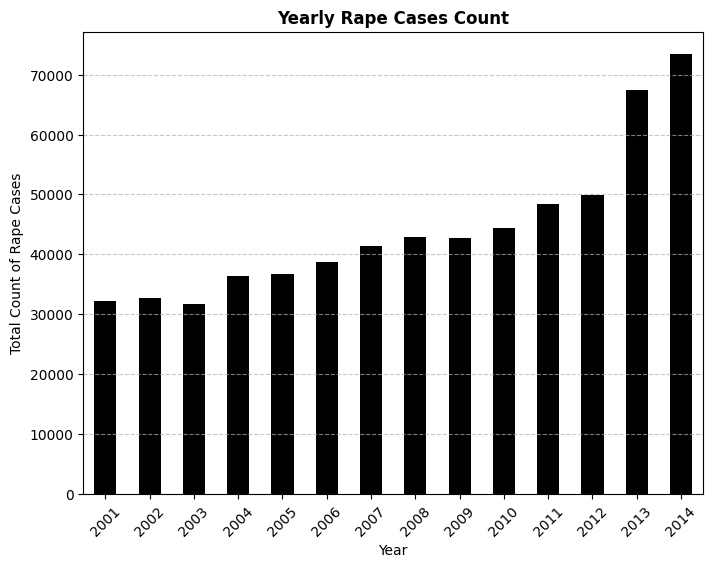

In [337]:
rape_counts = data.groupby('Year')['Rape'].sum()

# BAR PLOT for Rape Cases vs Count
plt.figure(figsize=(8, 6))
rape_counts.plot(kind='bar', color='black')
plt.title('Yearly Rape Cases Count', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Count of Rape Cases')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


initial_value = all_cases.loc[all_cases['Year'] == 2001, 'Rape'].values[0]
final_value = all_cases.loc[all_cases['Year'] == 2014, 'Rape'].values[0]
percentage_increase = ((final_value - initial_value) / initial_value) * 100

print(f"Percentage increase in rape cases from 2001 to 2014: {percentage_increase:.2f}%")

**NOTE 4 : There has been a 128.5% increase in rape cases from 2001 to 2014. We can also see a huge jump in cases during 2012-2013**

Percentage increase in Kidnapping cases from 2001 to 2014: 291.33%


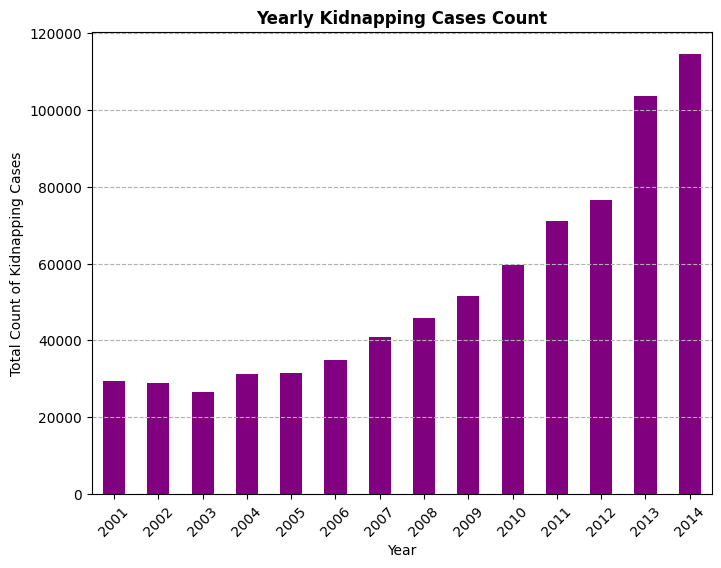

In [338]:
Kid_counts = data.groupby('Year')['Kidnapping'].sum()

# BAR PLOT for Kidnapping Cases vs Count
plt.figure(figsize=(8, 6))
Kid_counts.plot(kind='bar', color='purple')
plt.title('Yearly Kidnapping Cases Count', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Count of Kidnapping Cases')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')


initial_value = all_cases.loc[all_cases['Year'] == 2001, 'Kidnapping'].values[0]
final_value = all_cases.loc[all_cases['Year'] == 2014, 'Kidnapping'].values[0]
percentage_increase = ((final_value - initial_value) / initial_value) * 100

print(f"Percentage increase in Kidnapping cases from 2001 to 2014: {percentage_increase:.2f}%")

**NOTE 5: We can see an exponential increase in number of kidnapping cases reported in the given 14 years with an increase of 291.34%**



Percentage increase in Dowry_Deaths cases from 2001 to 2014: 23.41%


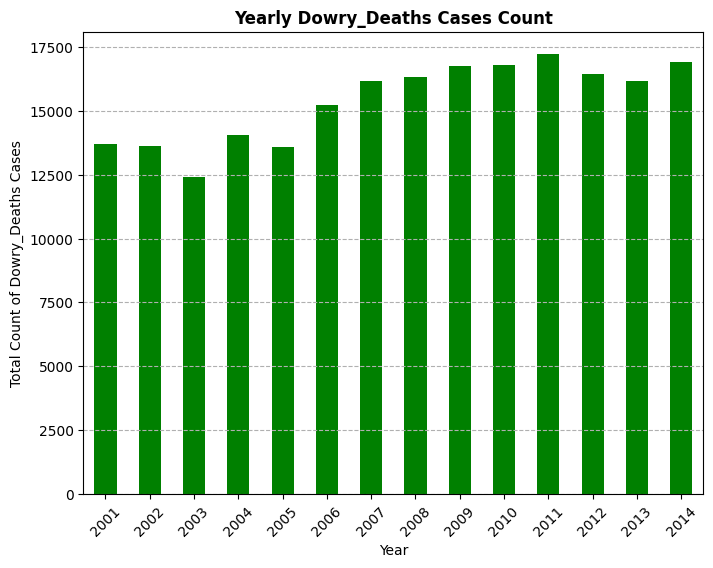

In [339]:
dd_counts = data.groupby('Year')['Dowry_Deaths'].sum()

# BAR PLOT for Kidnapping Cases vs Count
plt.figure(figsize=(8, 6))
dd_counts.plot(kind='bar', color='green')
plt.title('Yearly Dowry_Deaths Cases Count', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Count of Dowry_Deaths Cases')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')


initial_value2 = all_cases.loc[all_cases['Year'] == 2001, 'Dowry_Deaths'].values[0]
final_value2 = all_cases.loc[all_cases['Year'] == 2014, 'Dowry_Deaths'].values[0]
percentage_increase2 = ((final_value2 - initial_value2) / initial_value2) * 100

print(f"Percentage increase in Dowry_Deaths cases from 2001 to 2014: {percentage_increase2:.2f}%")

**NOTE 6: We can see a consistent number of cases reported as Dowry deaths without a large margin of difference although the percentage increase from 2001 to 2014 is 23.41**

Percentage increase in Assault cases from 2001 to 2014: 55.98%


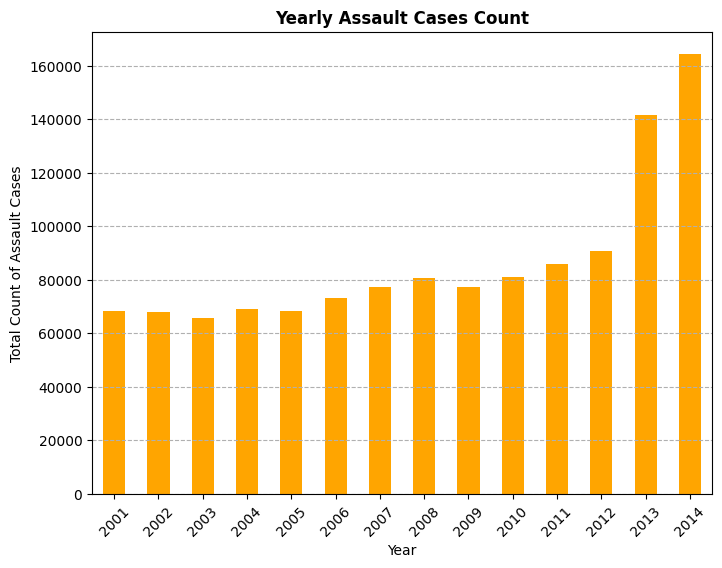

In [340]:
assault_count=data.groupby('Year')['Assault'].sum()

#BAR PLOT of Assault cases vs Count:
plt.figure(figsize=(8,6))
assault_count.plot(kind='bar',color='orange')
plt.title('Yearly Assault Cases Count',fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Count of Assault Cases')
plt.xticks(rotation=45)
plt.grid(axis='y',linestyle= '--')

initial_values3=all_cases.loc[all_cases['Year']==2012,'Assault'].values[0]
finnal_values3=all_cases.loc[all_cases['Year']==2013,'Assault'].values[0]
percentage_increase3=((finnal_values3-initial_values3)/initial_values3)*100

print(f"Percentage increase in Assault cases from 2001 to 2014: {percentage_increase3:.2f}%")


**NOTE 7: Until 2012, there has been consistent number of assault cases reported, with the biggest jump in the year 2012-2013 with an increase of 55.98%**


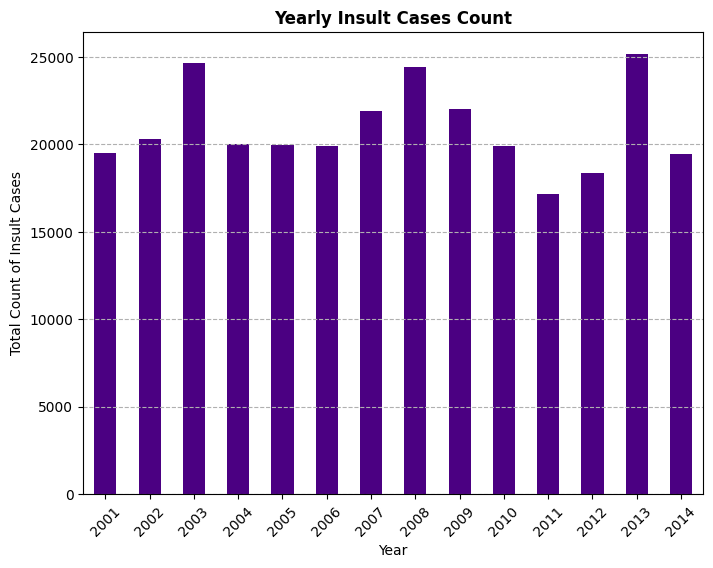

In [341]:
insult_count=data.groupby('Year')['Insult'].sum()

#BAR PLOT for insult cases vs count :
plt.figure(figsize=(8,6))
insult_count.plot(kind='bar',color='indigo')
plt.title('Yearly Insult Cases Count',fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Count of Insult Cases')
plt.xticks(rotation=45)
plt.grid(axis='y',linestyle= '--')


**NOTE 8: There have been constant fluctuations in the number of insult to modesty cases reported throughout 2001-2014**

Percentage increase in Domestic Violence cases from 2001 to 2014: 149.90%


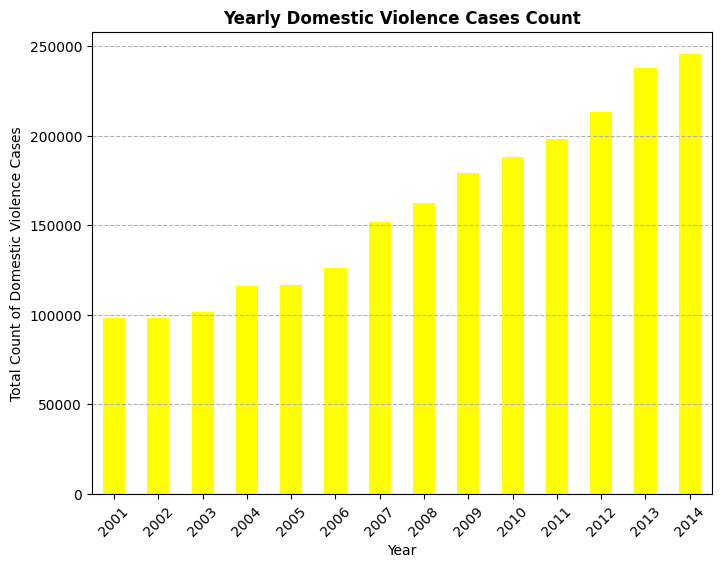

In [342]:
domestic_count=data.groupby('Year')['Domestic'].sum()

#BAR PLOT for Domestic violence cases vs count :
plt.figure(figsize=(8,6))
domestic_count.plot(kind='bar',color='yellow')
plt.title('Yearly Domestic Violence Cases Count',fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Count of Domestic Violence Cases')
plt.xticks(rotation=45)
plt.grid(axis='y',linestyle= '--')

initial_value4=all_cases.loc[all_cases['Year']==2001,'Domestic'].values[0]
final_value4=all_cases.loc[all_cases['Year']==2014,'Domestic'].values[0]

percentage_inc4=((final_value4-initial_value4)/initial_value4)*100
print(f"Percentage increase in Domestic Violence cases from 2001 to 2014: {percentage_inc4:.2f}%")

**NOTE 9:We can note the linear increase in the number of domestic violence cases reported with an increase of 149.9%**

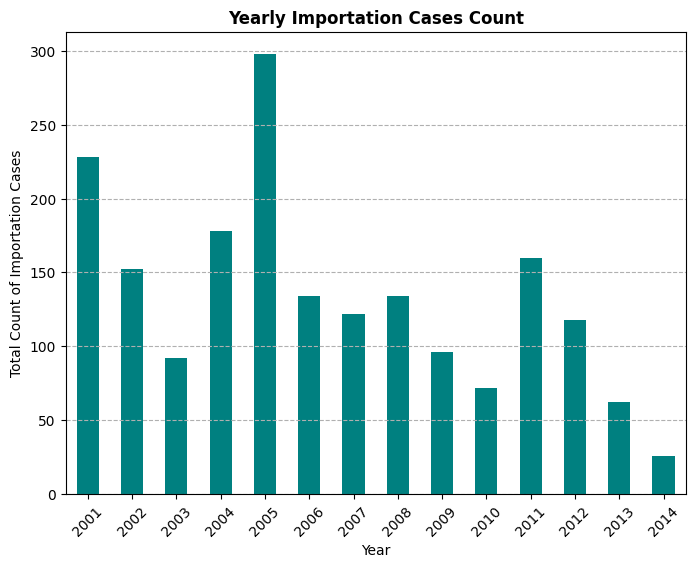

In [343]:
import_count=data.groupby('Year')['Importation'].sum()

#BAR PLOT for Importation cases vs count :
plt.figure(figsize=(8,6))
import_count.plot(kind='bar',color='teal')
plt.title('Yearly Importation Cases Count',fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Count of Importation Cases')
plt.xticks(rotation=45)
plt.grid(axis='y',linestyle='--')

**NOTE 10: We can note there have been fluctuations in the number of importation cases reported, with spikes detected during 2005 and 2011 and an overall decreasing trend**

# STATE/UT WISE ANALYSIS

In [344]:
def State(state_data):
    for i in list(data.columns)[3:]:
        state_data[i] = data.groupby(['STATE/UT'])[i].sum()

    return state_data

state_data = pd.DataFrame()
state_data = State(state_data)
state_data

,Rape,Kidnapping,Dowry_Deaths,Assault,Insult,Domestic,Importation
STATE/UT,,,,,,,
A&N ISLANDS,336,212,20,600,112,288,0
ANDHRA PRADESH,32150,34504,13844,126952,86964,280906,34
ARUNACHAL PRADESH,1316,1470,6,1996,48,476,0
ASSAM,40190,62074,3268,38256,254,115300,22
BIHAR,30758,57086,32206,16958,694,69770,904
CHANDIGARH,770,1682,90,1088,342,2080,0
CHHATTISGARH,29308,11808,2758,47096,3968,23436,12
D & N HAVELI,112,188,2,100,8,76,0
D&N HAVELI,20,36,0,6,4,14,0


In [345]:
state=pd.DataFrame(state_data.sum(axis=1),columns=['Total cases'])
print(state)

                   Total cases
STATE/UT                      
A&N ISLANDS               1568
ANDHRA PRADESH          575354
ARUNACHAL PRADESH         5312
ASSAM                   259364
BIHAR                   208376
CHANDIGARH                6052
CHHATTISGARH            118386
D & N HAVELI               486
D&N HAVELI                  80
DAMAN & DIU                230
DELHI                   152162
GOA                       4124
GUJARAT                 220306
HARYANA                 147924
HIMACHAL PRADESH         27174
JAMMU & KASHMIR          71692
JHARKHAND                79580
KARNATAKA               179160
KERALA                  225176
LAKSHADWEEP                 54
MADHYA PRADESH          467086
MAHARASHTRA             429584
MANIPUR                   5586
MEGHALAYA                 5410
MIZORAM                   4306
NAGALAND                  1072
ODISHA                  203794
PUDUCHERRY                2718
PUNJAB                   78258
RAJASTHAN               470186
SIKKIM  

In [346]:
state.sort_values(by='Total cases',ascending=False).head(10)

,Total cases
STATE/UT,
UTTAR PRADESH,582398
ANDHRA PRADESH,575354
WEST BENGAL,537976
RAJASTHAN,470186
MADHYA PRADESH,467086
MAHARASHTRA,429584
ASSAM,259364
KERALA,225176
GUJARAT,220306


Above are the 10 States/UTs with highest crimes reported against women

In [347]:
state.sort_values(by='Total cases',ascending=True).head(10)

,Total cases
STATE/UT,
LAKSHADWEEP,54
D&N HAVELI,80
DAMAN & DIU,230
D & N HAVELI,486
NAGALAND,1072
SIKKIM,1482
A&N ISLANDS,1568
PUDUCHERRY,2718
GOA,4124


Above are the 10 States/UTs with least crimes reported against women

NOTE 11 :From above two tables we can deduce that **Uttar Pradesh** is the state with highest number of crimes reported against women while **Lakshadweep** being the safest

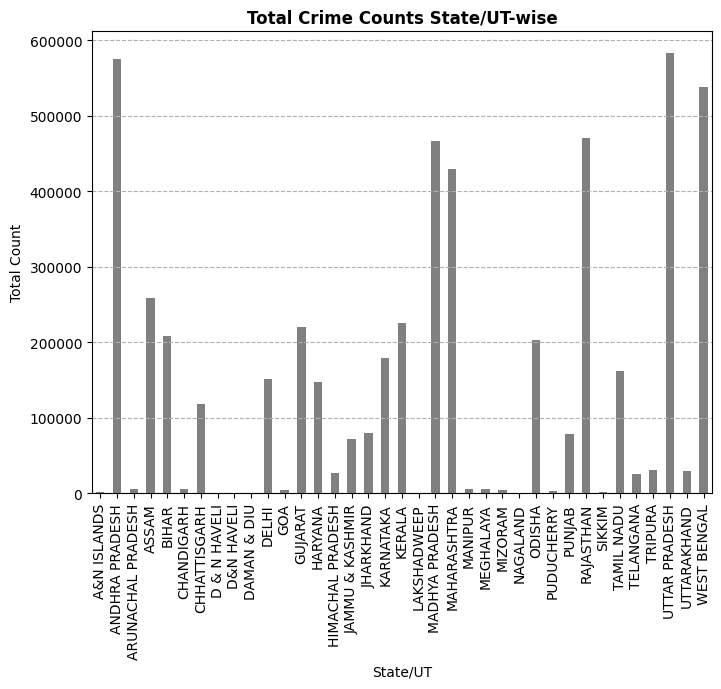

In [348]:
state=pd.DataFrame(state_data.sum(axis=1), columns=["Total cases"])

plt.figure(figsize=(8, 6))
state['Total cases'].plot(kind='bar', color='grey')
plt.title('Total Crime Counts State/UT-wise', fontweight='bold')
plt.xlabel('State/UT')
plt.ylabel('Total Count')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--')


In [349]:
pd.DataFrame(state_data.idxmax(),columns=['STATE/UT'])

,STATE/UT
Rape,MADHYA PRADESH
Kidnapping,UTTAR PRADESH
Dowry_Deaths,UTTAR PRADESH
Assault,MADHYA PRADESH
Insult,ANDHRA PRADESH
Domestic,WEST BENGAL
Importation,BIHAR


**NOTE 12: We can see that both Uttar Pradesh and Madhya Pradesh are the most unsafe for 2 types of crimes each**

SPECIFIC STATE/UT ANALYSIS

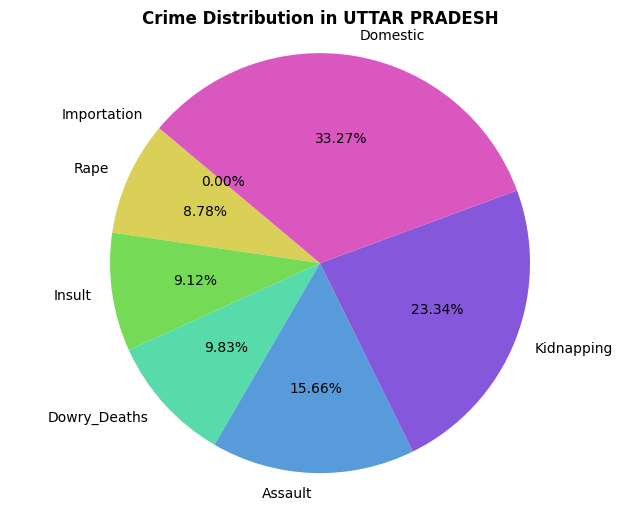

Importation          6
Rape             51150
Insult           53130
Dowry_Deaths     57256
Assault          91212
Kidnapping      135906
Domestic        193738
dtype: int64


In [350]:
state_name = 'UTTAR PRADESH'
state_data = data[data['STATE/UT'] == state_name]
crime_counts = state_data[crime_columns].sum()
crime_counts=crime_counts.sort_values(ascending=True)
plt.figure(figsize=(8, 6))
colors = sns.color_palette("hls", len(crime_distribution))
plt.pie(crime_counts, labels=crime_counts.index, autopct='%1.2f%%', startangle=140, colors=colors)
plt.title(f'Crime Distribution in {state_name}', fontweight='bold')
plt.axis('equal')
plt.show()
print(crime_counts)




***NOTE 13 : We can deduce from above pie chart that Domestic violence is the most reported crime against women followed by kidnapping ***

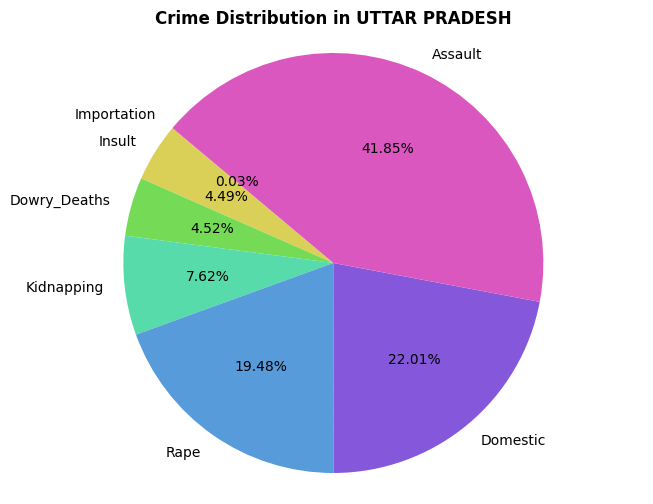

Importation        134
Insult           20964
Dowry_Deaths     21090
Kidnapping       35608
Rape             90996
Domestic        102816
Assault         195478
dtype: int64


In [351]:
state_name1='MADHYA PRADESH'
state_data1=data[data['STATE/UT']==state_name1]
state_count1=state_data1[crime_columns].sum()
state_count1=state_count1.sort_values(ascending=True)
plt.figure(figsize=(8,6))
colors=sns.color_palette("hls",len(state_count1))
plt.pie(state_count1,labels=state_count1.index,autopct='%1.2f%%',startangle=140,colors=colors)
plt.title(f'Crime Distribution in {state_name}',fontweight='bold')
plt.axis('equal')
plt.show()
print(state_count1)

**NOTE 14 : We can see that in MADHYA PRADESH assault is the highest reported crime which covers almost half of the distribution followed by domestic violence**

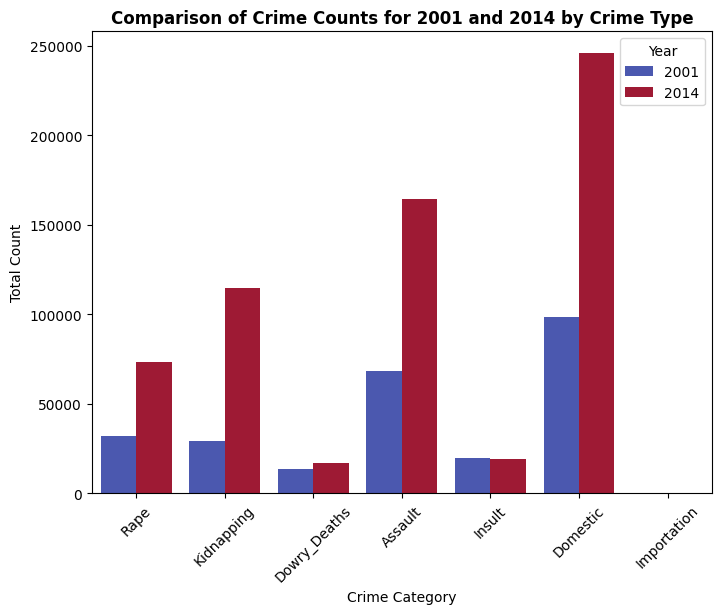

In [352]:
filtered_data = data[data['Year'].isin([2001, 2014])]
yearly_crime_counts = filtered_data.groupby('Year')[crime_columns].sum().reset_index()

melted_data = pd.melt(yearly_crime_counts, id_vars='Year', var_name='Crime_Type', value_name='Count')

plt.figure(figsize=(8, 6))
sns.barplot(data=melted_data, x='Crime_Type', y='Count', hue='Year', palette='coolwarm')
plt.title('Comparison of Crime Counts for 2001 and 2014 by Crime Type', fontweight='bold')
plt.xlabel('Crime Category')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.legend(title='Year')

plt.show()

**NOTE 14: We can see that there is a major jump in the crime rate from the year 2001 to 2014 except in the case Dowry Deaths (remains constant, with a little increase), Insult to modesty (where there is a very subtle decrease in crimes) and Importation of Girls (where the crime rate has actually dropped)**

# Classifying the STATE/UTs and Districts as SAFE OR UNSAFE based on a Threshold value( here mean )

In [353]:
data['Total_Crimes'] = data[['Rape', 'Kidnapping', 'Dowry_Deaths', 'Assault', 'Insult', 'Domestic', 'Importation']].sum(axis=1)
district_crime_totals = data.groupby(['STATE/UT', 'DISTRICT'])['Total_Crimes'].sum().reset_index()
threshold_dist =20

state_crime_totals = district_crime_totals.groupby('STATE/UT')['Total_Crimes'].sum().reset_index()
threshold_state=state_crime_totals['Total_Crimes'].mean()
print("Threshold for district: ",threshold_dist)
print("Threshold for state: ",threshold_state)


Threshold for district:  20
Threshold for state:  143827.2972972973


In [354]:
district_crime_totals['DISTRICT SAFETY'] = district_crime_totals['Total_Crimes'].apply(lambda x: 'Unsafe' if x > threshold_dist else 'Safe')
district_crime_totals.rename(columns={'Total_Crimes':'Dist_crimes'},inplace=True)
state_crime_totals['STATE/UT SAFETY'] = state_crime_totals['Total_Crimes'].apply(lambda x: 'Unsafe' if x > threshold_state else 'Safe')
print(district_crime_totals[['STATE/UT', 'DISTRICT', 'Dist_crimes', 'DISTRICT SAFETY']])
print(state_crime_totals[['STATE/UT', 'Total_Crimes', 'STATE/UT SAFETY']])



         STATE/UT           DISTRICT  Dist_crimes DISTRICT SAFETY
0     A&N ISLANDS    A and N ISLANDS           54          Unsafe
1     A&N ISLANDS            ANDAMAN          458          Unsafe
2     A&N ISLANDS                CAR            7            Safe
3     A&N ISLANDS            NICOBAR           11            Safe
4     A&N ISLANDS              NORTH           35          Unsafe
...           ...                ...          ...             ...
1745  WEST BENGAL              TOTAL       202939          Unsafe
1746  WEST BENGAL  Total District(s)        36438          Unsafe
1747  WEST BENGAL     UTTAR DINAJPUR         6996          Unsafe
1748  WEST BENGAL     Uttar Dinajpur         1307          Unsafe
1749  WEST BENGAL           ZZ TOTAL        29611          Unsafe

[1750 rows x 4 columns]
             STATE/UT  Total_Crimes STATE/UT SAFETY
0         A&N ISLANDS          1568            Safe
1      ANDHRA PRADESH        575354          Unsafe
2   ARUNACHAL PRADESH      

In [355]:
df1=pd.DataFrame(data)
df2=pd.DataFrame(district_crime_totals)
df3=pd.DataFrame(state_crime_totals)
df_dist=pd.merge(df1,df2,on=['DISTRICT','STATE/UT'],how='left')
df_dist.drop(columns='Dist_crimes',inplace=True)

def State(state_data):
    for i in list(data.columns)[3:]:
        state_data[i] = data.groupby(['STATE/UT'])[i].sum()

    return state_data

state_data = pd.DataFrame()
state_data = State(state_data)
state_crime_totals[['STATE/UT', 'STATE/UT SAFETY']]
df_state=pd.merge(state_data,state_crime_totals,on='STATE/UT',how='left')
print(df_state.head(5))
print(df_dist.head(5))





            STATE/UT   Rape  Kidnapping  ...  Total_Crimes_x  Total_Crimes_y  STATE/UT SAFETY
0        A&N ISLANDS    336         212  ...            1568            1568             Safe
1     ANDHRA PRADESH  32150       34504  ...          575354          575354           Unsafe
2  ARUNACHAL PRADESH   1316        1470  ...            5312            5312             Safe
3              ASSAM  40190       62074  ...          259364          259364           Unsafe
4              BIHAR  30758       57086  ...          208376          208376           Unsafe

[5 rows x 11 columns]
         STATE/UT       DISTRICT  Year  Rape  ...  Domestic  Importation  Total_Crimes  DISTRICT SAFETY
0  ANDHRA PRADESH       ADILABAD  2001    50  ...       175            0           454           Unsafe
1  ANDHRA PRADESH      ANANTAPUR  2001    23  ...       154            0           356           Unsafe
2  ANDHRA PRADESH       CHITTOOR  2001    27  ...       186            0           456           Unsa

MODEL TRAINING

In [356]:
x_state = df_state.iloc[:, :-2]
y_state = df_state.iloc[:, -1]
x_dist = df_dist.iloc[:, :-1]
y_dist = df_dist.iloc[:, -1]


In [357]:
X_state = pd.get_dummies(x_state, columns=['STATE/UT'], drop_first=True)
X_state.head(2)
X_dist= pd.get_dummies(df_dist, columns=['STATE/UT', 'DISTRICT'], drop_first=True)
X_dist.head(2)

,Year,Rape,Kidnapping,Dowry_Deaths,Assault,Insult,Domestic,Importation,Total_Crimes,DISTRICT SAFETY,STATE/UT_ANDHRA PRADESH,STATE/UT_ARUNACHAL PRADESH,STATE/UT_ASSAM,STATE/UT_BIHAR,STATE/UT_CHANDIGARH,STATE/UT_CHHATTISGARH,STATE/UT_D & N HAVELI,STATE/UT_D&N HAVELI,STATE/UT_DAMAN & DIU,STATE/UT_DELHI,STATE/UT_GOA,STATE/UT_GUJARAT,STATE/UT_HARYANA,STATE/UT_HIMACHAL PRADESH,STATE/UT_JAMMU & KASHMIR,STATE/UT_JHARKHAND,STATE/UT_KARNATAKA,STATE/UT_KERALA,STATE/UT_LAKSHADWEEP,STATE/UT_MADHYA PRADESH,STATE/UT_MAHARASHTRA,STATE/UT_MANIPUR,STATE/UT_MEGHALAYA,STATE/UT_MIZORAM,STATE/UT_NAGALAND,STATE/UT_ODISHA,STATE/UT_PUDUCHERRY,STATE/UT_PUNJAB,STATE/UT_RAJASTHAN,STATE/UT_SIKKIM,STATE/UT_TAMIL NADU,STATE/UT_TELANGANA,STATE/UT_TRIPURA,STATE/UT_UTTAR PRADESH,STATE/UT_UTTARAKHAND,STATE/UT_WEST BENGAL,DISTRICT_24 PARGANAS SOUTH,DISTRICT_A and N ISLANDS,DISTRICT_ADILABAD,DISTRICT_AGAR,...,DISTRICT_VIRUDHUNAGAR,DISTRICT_VISAKHA RURAL,DISTRICT_VISAKHAPATNAM,DISTRICT_VIZIANAGARAM,DISTRICT_Vadodara City,DISTRICT_Vadodara Rural,DISTRICT_Vaishali,DISTRICT_Valsad,DISTRICT_Varanasi,DISTRICT_Vellore,DISTRICT_Vidisha,DISTRICT_Vigilance,DISTRICT_Vijayapura,DISTRICT_Vijayawada City,DISTRICT_Vijayawada Railway,DISTRICT_Villupuram,DISTRICT_Virudhunagar,DISTRICT_Visakha Rural,DISTRICT_Visakhapatnam,DISTRICT_Vizianagaram,DISTRICT_W.RLY,DISTRICT_W.RLY AHMEDABAD,DISTRICT_W.RLY VADODARA,DISTRICT_W.Rly Ahmedabad,DISTRICT_W.Rly Vadodara,DISTRICT_WARANGAL,DISTRICT_WARANGAL URBAN,DISTRICT_WARDHA,DISTRICT_WASHIM,DISTRICT_WAYANADU,DISTRICT_WEST,DISTRICT_WEST GODAVARI,DISTRICT_WOKHA,DISTRICT_Warangal City,DISTRICT_Warangal Rural,DISTRICT_Wardha,DISTRICT_Washim,DISTRICT_Wayanadu,DISTRICT_West,DISTRICT_West Godavari,DISTRICT_Wokha,DISTRICT_YADGIRI,DISTRICT_YAMUNANAGAR,DISTRICT_YAVATMAL,DISTRICT_Yadgiri,DISTRICT_Yamunanagar,DISTRICT_Yavatmal,DISTRICT_ZUNHEBOTO,DISTRICT_ZZ TOTAL,DISTRICT_Zunheboto
0,2001,50,30,16,149,34,175,0,454,Unsafe,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2001,23,30,7,118,24,154,0,356,Unsafe,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [358]:
X_state.iloc[:,8:] = X_state.iloc[:,8:].astype(int)
X_state.tail()
safety_mapping = {'Unsafe': 0, 'Safe': 1}
for column in X_dist.columns[7:]:
    X_dist[column] = X_dist[column].map(safety_mapping).fillna(X_dist[column])
X_dist.iloc[:,7:] = X_dist.iloc[:,7:].astype(int)

X_dist.tail(2)

Streaming output truncated to the last 5000 lines.
        ..
10672    0
10673    0
10674    0
10675    0
10676    0
Name: DISTRICT_ROHTAS, Length: 10677, dtype: int64' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  X_dist.iloc[:,7:] = X_dist.iloc[:,7:].astype(int)
<ipython-input-358-fe46a2f61f11>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        0
1        0
2        0
3        0
4        0
        ..
10672    0
10673    0
10674    0
10675    0
10676    0
Name: DISTRICT_ROPAR, Length: 10677, dtype: int64' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  X_dist.iloc[:,7:] = X_dist.iloc[:,7:].astype(int)
<ipython-input-358-fe46a2f61f11>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        0
1        0
2        0
3        0
4        0
        ..
10672    

,Year,Rape,Kidnapping,Dowry_Deaths,Assault,Insult,Domestic,Importation,Total_Crimes,DISTRICT SAFETY,STATE/UT_ANDHRA PRADESH,STATE/UT_ARUNACHAL PRADESH,STATE/UT_ASSAM,STATE/UT_BIHAR,STATE/UT_CHANDIGARH,STATE/UT_CHHATTISGARH,STATE/UT_D & N HAVELI,STATE/UT_D&N HAVELI,STATE/UT_DAMAN & DIU,STATE/UT_DELHI,STATE/UT_GOA,STATE/UT_GUJARAT,STATE/UT_HARYANA,STATE/UT_HIMACHAL PRADESH,STATE/UT_JAMMU & KASHMIR,STATE/UT_JHARKHAND,STATE/UT_KARNATAKA,STATE/UT_KERALA,STATE/UT_LAKSHADWEEP,STATE/UT_MADHYA PRADESH,STATE/UT_MAHARASHTRA,STATE/UT_MANIPUR,STATE/UT_MEGHALAYA,STATE/UT_MIZORAM,STATE/UT_NAGALAND,STATE/UT_ODISHA,STATE/UT_PUDUCHERRY,STATE/UT_PUNJAB,STATE/UT_RAJASTHAN,STATE/UT_SIKKIM,STATE/UT_TAMIL NADU,STATE/UT_TELANGANA,STATE/UT_TRIPURA,STATE/UT_UTTAR PRADESH,STATE/UT_UTTARAKHAND,STATE/UT_WEST BENGAL,DISTRICT_24 PARGANAS SOUTH,DISTRICT_A and N ISLANDS,DISTRICT_ADILABAD,DISTRICT_AGAR,...,DISTRICT_VIRUDHUNAGAR,DISTRICT_VISAKHA RURAL,DISTRICT_VISAKHAPATNAM,DISTRICT_VIZIANAGARAM,DISTRICT_Vadodara City,DISTRICT_Vadodara Rural,DISTRICT_Vaishali,DISTRICT_Valsad,DISTRICT_Varanasi,DISTRICT_Vellore,DISTRICT_Vidisha,DISTRICT_Vigilance,DISTRICT_Vijayapura,DISTRICT_Vijayawada City,DISTRICT_Vijayawada Railway,DISTRICT_Villupuram,DISTRICT_Virudhunagar,DISTRICT_Visakha Rural,DISTRICT_Visakhapatnam,DISTRICT_Vizianagaram,DISTRICT_W.RLY,DISTRICT_W.RLY AHMEDABAD,DISTRICT_W.RLY VADODARA,DISTRICT_W.Rly Ahmedabad,DISTRICT_W.Rly Vadodara,DISTRICT_WARANGAL,DISTRICT_WARANGAL URBAN,DISTRICT_WARDHA,DISTRICT_WASHIM,DISTRICT_WAYANADU,DISTRICT_WEST,DISTRICT_WEST GODAVARI,DISTRICT_WOKHA,DISTRICT_Warangal City,DISTRICT_Warangal Rural,DISTRICT_Wardha,DISTRICT_Washim,DISTRICT_Wayanadu,DISTRICT_West,DISTRICT_West Godavari,DISTRICT_Wokha,DISTRICT_YADGIRI,DISTRICT_YAMUNANAGAR,DISTRICT_YAVATMAL,DISTRICT_Yadgiri,DISTRICT_Yamunanagar,DISTRICT_Yavatmal,DISTRICT_ZUNHEBOTO,DISTRICT_ZZ TOTAL,DISTRICT_Zunheboto
10675,2014,7,6,1,20,7,3,0.0,44.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10676,2014,10,7,1,32,8,4,0.0,62.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [359]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y1= le.fit_transform(y_state)
print(y1)



[0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1]


In [360]:
from sklearn.model_selection import train_test_split
X_state_train, X_state_test, y_state_train, y_state_test = train_test_split(X_state, y1, test_size=0.20, random_state=0)
X_dist_train, X_dist_test, y_dist_train, y_dist_test = train_test_split(X_dist, y2, test_size=0.20, random_state=0)
print(X_state_train.shape)
print(X_state_test.shape)
print(X_dist_train.shape)
print(X_dist_test.shape)

(29, 44)
(8, 44)
(8541, 1650)
(2136, 1650)


In [361]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_state_train = sc.fit_transform(X_state_train)
X_state_test = sc.transform(X_state_test)

X_dist_train = sc.fit_transform(X_dist_train)
X_dist_test = sc.transform(X_dist_test)


# LOGISTIC REGRESSION MODEL

In [362]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_state_train, y_state_train)
y_pred = classifier.predict(X_state_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_state_test, y_pred)
print(cm)
accuracy_score(y_state_test, y_pred)*100
print(y_state_test.shape)
print(y_pred.shape)

[[5 0]
 [2 1]]
(8,)
(8,)


In [363]:
from sklearn.metrics import classification_report
print(classification_report(y_state_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.33      0.50         3

    accuracy                           0.75         8
   macro avg       0.86      0.67      0.67         8
weighted avg       0.82      0.75      0.71         8



# KNN MODEL

In [364]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_state_train, y_state_train)
y_pred = knn.predict(X_state_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_state_test, y_pred)
print(cm)
accuracy_score(y_state_test, y_pred)*100

[[5 0]
 [0 3]]


100.0

# SVC MODEL

In [365]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(X_state_train, y_state_train)
y_pred = svc.predict(X_state_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_state_test, y_pred)
print(cm)
acc = accuracy_score(y_state_test, y_pred)*100
print(acc)

[[5 0]
 [2 1]]
75.0


# DECISION TREE

In [366]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_state_train, y_state_train)
y_pred = model.predict(X_state_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_state_test, y_pred)
print(cm)
acc = accuracy_score(y_state_test, y_pred)*100
print(acc)

[[5 0]
 [0 3]]
100.0


# NAIVE BAYES MODEL

In [367]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_state_train, y_state_train)
y_pred = model.predict(X_state_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_state_test, y_pred)
print(cm)
acc = accuracy_score(y_state_test, y_pred)*100
print(acc)

[[0 5]
 [0 3]]
37.5


# RANDOM FOREST

In [368]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_state_train, y_state_train)
y_pred = model.predict(X_state_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_state_test, y_pred)
print(cm)
acc = accuracy_score(y_state_test, y_pred)*100
print(acc)

[[5 0]
 [0 3]]
100.0


# SUMMARY
The **K-Nearest Neighbors (KNN), Decision Tree, and Random Forest models** have proven to be the most effective classifiers for this dataset, each achieving a remarkable accuracy of **100%**. In contrast, the **Naive Bayes model** performs poorly, with an accuracy of only **37.5%**, making it the least suitable model for this classification task.